In [802]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, f1_score,roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

In [803]:
def d_types_report(house_train):
    columns=[]
    d_types=[]
    uniques=[]
    n_uniques=[]
    null_values=[]
    null_values_percentage=[]
    
    for i in house_train.columns:
        columns.append(i)
        d_types.append(house_train[i].dtypes)
        uniques.append(house_train[i].unique()[:5])
        n_uniques.append(house_train[i].nunique())
        null_values.append(house_train[i].isna().sum())
        null_values_percentage.append(null_values[-1] * 100 / house_train.shape[0])

    return pd.DataFrame({"Columns": columns, "Data_Types": d_types, "Unique_values": uniques, "N_Uniques": n_uniques,  "Null_Values": null_values, "Null_Values_percentage": null_values_percentage})

In [804]:
def binary_classification_performance(y_test, y_pred):
    tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
    accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_test),4)
    precision = round(precision_score(y_pred = y_pred, y_true = y_test),4)
    recall = round(recall_score(y_pred = y_pred, y_true = y_test),4)
    f1_score = round(2*precision*recall/(precision + recall),4)
    auc_roc = round(roc_auc_score(y_score = y_pred, y_true = y_test),4)

    result = pd.DataFrame({
        'Method':['Accuracy', 'f1 score', 'AUC_ROC', 'Precision', 'Recall'],
        'Value': [accuracy, f1_score, auc_roc, precision, recall]
    })

    return result

In [805]:
df_train = pd.read_csv('https://raw.githubusercontent.com/NirmalSankalana/telco-customer-churn-analyse/main/Train_Dataset.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/NirmalSankalana/telco-customer-churn-analyse/main/Test_Dataset.csv')
df_train_original = df_train.copy()
df_test_original = df_test.copy()

In [806]:
def submission(pred, ml_algorithm):
    output = pd.DataFrame({'customer_id': df_test_original.customer_id,
                        'Churn': test_pred})
    output ['Churn'].replace(to_replace=1, value='Yes', inplace=True)
    output ['Churn'].replace(to_replace=0, value='No', inplace=True)
                        
    file_name = ml_algorithm + '.csv'
    return output.to_csv(file_name, index=False)

In [807]:
df_train.head()

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn,Unnamed: 20
0,1001,15.0,452,no,no,0.0,121.1,130.0,20.59,216.0,...,18.36,235.1,33.0,10.58,16.1,5.0,4.35,2.0,No,NaN
1,1002,105.0,452,no,no,0.0,259.3,96.0,44.08,175.2,...,14.89,222.4,36.0,10.01,12.0,5.0,3.24,3.0,No,NaN
2,1003,97.0,452,no,yes,32.0,183.4,94.0,31.18,269.1,...,22.87,203.5,38.0,9.16,6.7,4.0,1.81,5.0,No,NaN
3,1004,121.0,445,no,yes,35.0,68.7,95.0,11.68,209.2,...,17.78,197.4,42.0,8.88,11.4,4.0,3.08,1.0,No,NaN
4,1005,98.0,452,no,yes,22.0,278.3,89.0,47.31,93.4,...,7.94,107.6,42.0,4.84,9.7,5.0,2.62,0.0,No,NaN


In [808]:
df_test.head()

,customer_id,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Unnamed: 19,Unnamed: 20
0,3322,91,445.0,yes,no,0.0,258.4,112.0,42.89,190.0,...,14.47,158.6,105.0,7.09,12.1,3.0,3.27,2.0,NaN,NaN
1,3323,113,445.0,no,yes,20.0,155.8,81.0,28.83,168.5,...,13.73,275.5,105.0,12.22,8.7,3.0,2.35,5.0,NaN,NaN
2,3324,122,445.0,no,no,0.0,237.2,137.0,40.30,263.8,...,22.76,251.3,105.0,10.81,8.8,4.0,2.38,1.0,NaN,NaN
3,3325,103,445.0,no,no,0.0,133.6,117.0,23.60,156.1,...,13.37,207.2,105.0,9.95,10.4,7.0,2.81,8.0,NaN,NaN
4,3326,111,452.0,no,no,0.0,115.6,120.0,24.54,211.1,...,18.79,140.9,105.0,5.76,12.7,1.0,3.43,4.0,NaN,NaN


In [809]:
df_train.drop(['customer_id','Unnamed: 20'], axis=1, inplace=True, errors='ignore')
df_test.drop(['customer_id','Unnamed: 19', 'Unnamed: 20'], axis=1, inplace=True, errors='ignore')
# df_train.drop(df_train[df_train['Churn'].isna()].index,inplace=True)
df_train.drop_duplicates(inplace=True)
df_test.drop_duplicates(inplace=True)

In [810]:
report_train = d_types_report(df_train)
report_train

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
0,account_length,float64,"[15.0, 105.0, 97.0, 121.0, 98.0]",204,2,0.086319
1,location_code,int64,"[452, 445, 547]",3,0,0.000000
2,intertiol_plan,object,"[no, yes, nan]",2,3,0.129478
3,voice_mail_plan,object,"[no, yes, nan]",2,6,0.258956
4,number_vm_messages,float64,"[0.0, 32.0, 35.0, 22.0, 17.0]",44,3,0.129478
5,total_day_min,float64,"[121.1, 259.3, 183.4, 68.7, 278.3]",1410,1,0.043159
6,total_day_calls,float64,"[130.0, 96.0, 94.0, 95.0, 89.0]",118,3,0.129478
7,total_day_charge,float64,"[20.59, 44.08, 31.18, 11.68, 47.31]",1445,5,0.215796
8,total_eve_min,float64,"[216.0, 175.2, 269.1, 209.2, 93.4]",1357,3,0.129478
9,total_eve_calls,float64,"[86.0, 97.0, 120.0, 69.0, 143.0]",117,4,0.172637


In [811]:
numerical_columns = ['account_length', 'number_vm_messages', 'total_day_min', 'total_day_calls', 'total_day_charge', 'total_eve_min', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']
categorical_columns = ['location_code', 'intertiol_plan', 'voice_mail_plan', 'Churn']

In [812]:
for i in numerical_columns:
  df_train[i]=df_train[i].mask(df_train[i]<0,np.nan)
  df_test[i].mask(df_test[i]<0,np.nan)

### Imputing Missing Values

In [813]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer 
    
def missing_value_imputer(df):
    mice_imputer = IterativeImputer()
    imputer = SimpleImputer(strategy='most_frequent')

    for col in df.columns:
        if col in categorical_columns:
            impute = imputer.fit(df[[col]])
            df[[col]] = impute.transform(df[[col]])
        if col in numerical_columns:
            df[col] = mice_imputer.fit_transform(df[[col]])
missing_value_imputer(df_train)
missing_value_imputer(df_test)

In [814]:
d_types_report(df_train)

,Columns,Data_Types,Unique_values,N_Uniques,Null_Values,Null_Values_percentage
0,account_length,float64,"[15.0, 105.0, 97.0, 121.0, 98.0]",205,0,0.0
1,location_code,int64,"[452, 445, 547]",3,0,0.0
2,intertiol_plan,object,"[no, yes]",2,0,0.0
3,voice_mail_plan,object,"[no, yes]",2,0,0.0
4,number_vm_messages,float64,"[0.0, 32.0, 35.0, 22.0, 17.0]",44,0,0.0
5,total_day_min,float64,"[121.1, 259.3, 183.4, 68.7, 278.3]",1407,0,0.0
6,total_day_calls,float64,"[130.0, 96.0, 94.0, 95.0, 89.0]",118,0,0.0
7,total_day_charge,float64,"[20.59, 44.08, 31.18, 11.68, 47.31]",1444,0,0.0
8,total_eve_min,float64,"[216.0, 175.2, 269.1, 209.2, 93.4]",1357,0,0.0
9,total_eve_calls,float64,"[86.0, 97.0, 120.0, 69.0, 143.0]",116,0,0.0


### Imputing Outliers

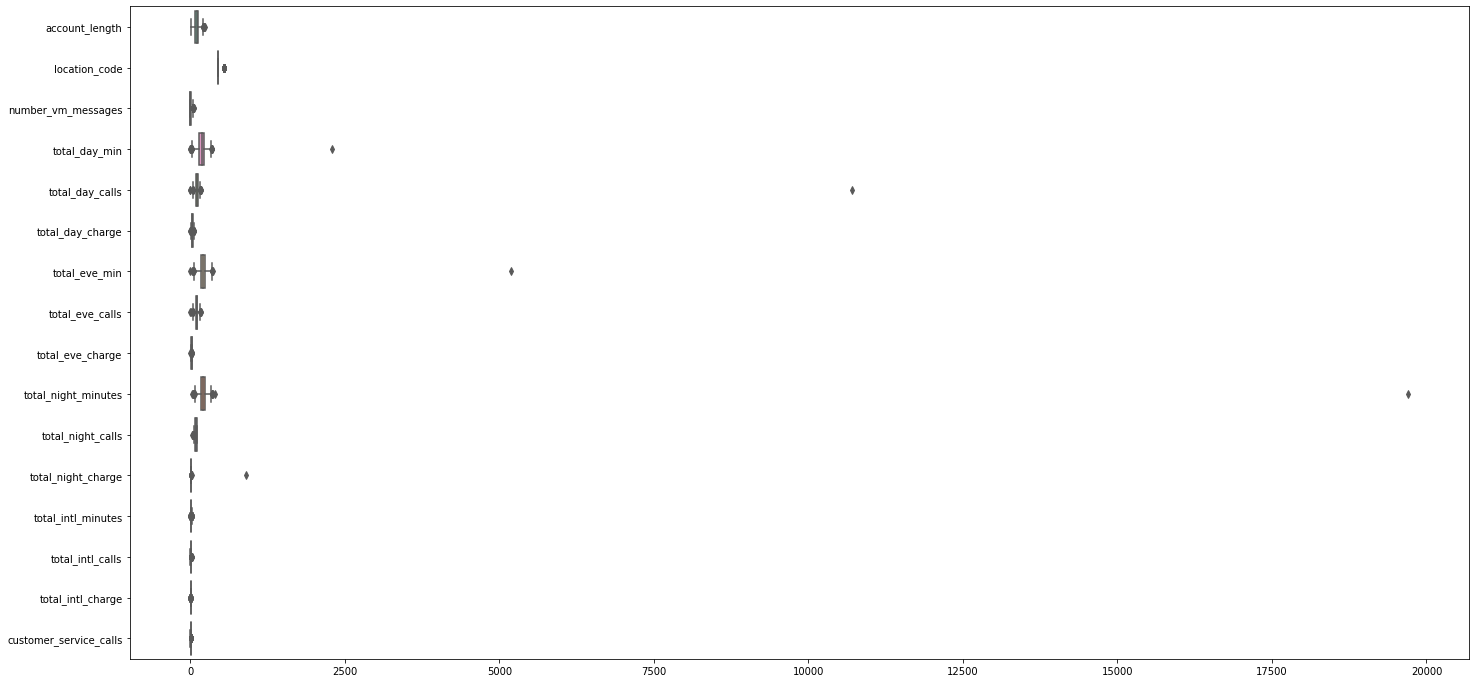

In [815]:
plt.figure(figsize=(24, 12))
ax = sns.boxplot(data=df_train, orient="h", palette="Set2")

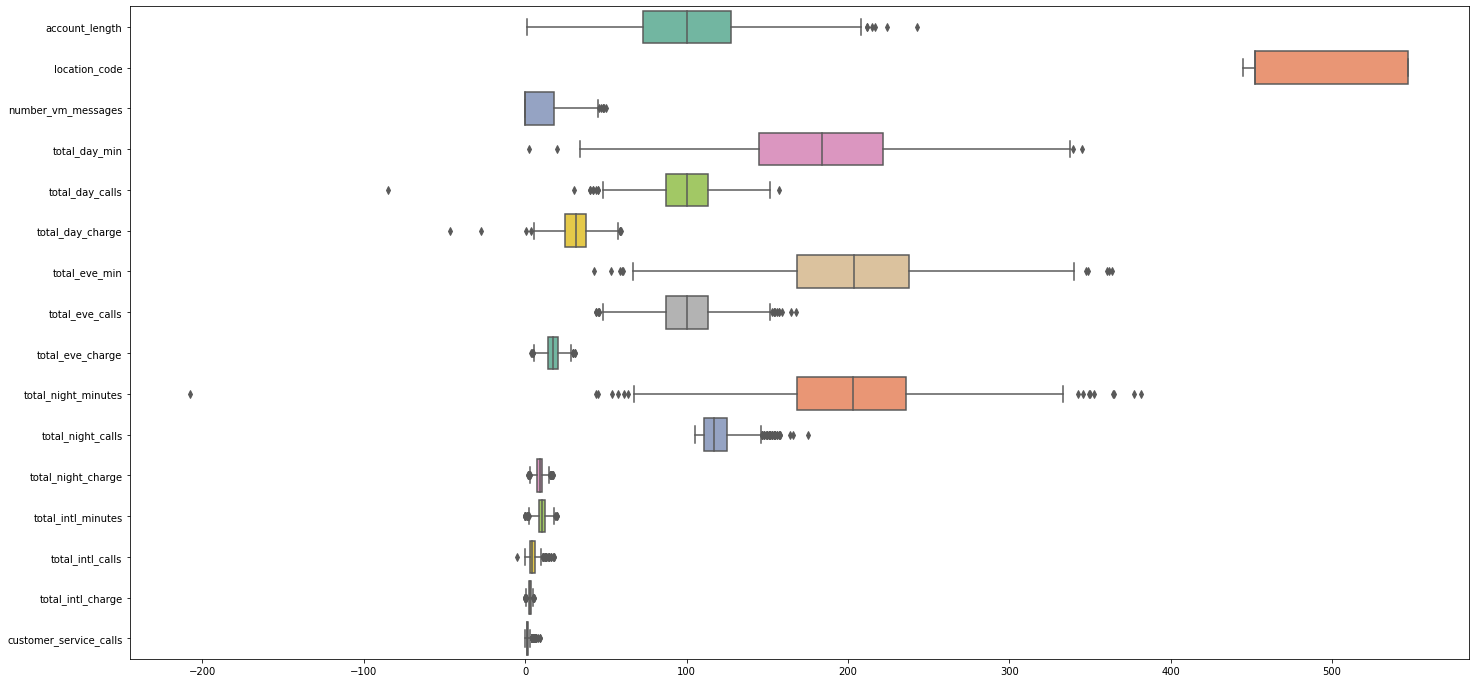

In [816]:
plt.figure(figsize=(24, 12))
ax = sns.boxplot(data=df_test, orient="h", palette="Set2")

In [817]:
# def iqr_outlier_imputer(df):
#     for i in numerical_columns:
#         fence = 1.5
#         Q1=df[i].quantile(0.25)
#         Q3=df[i].quantile(0.75)
#         IQR=Q3-Q1
#         Lower_Whisker = Q1-fence*IQR
#         Upper_Whisker = Q3+fence*IQR
#         df[i] = df[i].apply(lambda x: df[i].median() if (x > Upper_Whisker or x < Lower_Whisker)  else x)
#     return df
# df_train = iqr_outlier_imputer(df_train)
# df_test = iqr_outlier_imputer(df_test)

In [818]:
def outlier_imputer(df):
    for col in numerical_columns:
        impute_outliers(df[col])

def detect_outliers(data):
    outliers=[]
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > threshold):
            outliers.append(i)
    return outliers

def impute_outliers(data):
    outliers=detect_outliers(data)
    imputer = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
    for i in outliers:
        median = np.median(data)
        data.replace(i,median,inplace=True)# Replace with nan
    return data

# z_score_outlier_imputer(df_train)
# z_score_outlier_imputer(df_test)

In [819]:
def z_score_outlier_imputer(df):
    for col in numerical_columns:
        impute_outliers(df[col])

def detect_outliers(data):
    outliers=[]
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > threshold):
            outliers.append(i)
    return outliers

def impute_outliers(data):
    outliers=detect_outliers(data)
    for i in outliers:
        median = np.median(data)
        data.replace(i,median,inplace=True)# Replace with nan
    return data

z_score_outlier_imputer(df_train)
z_score_outlier_imputer(df_test)

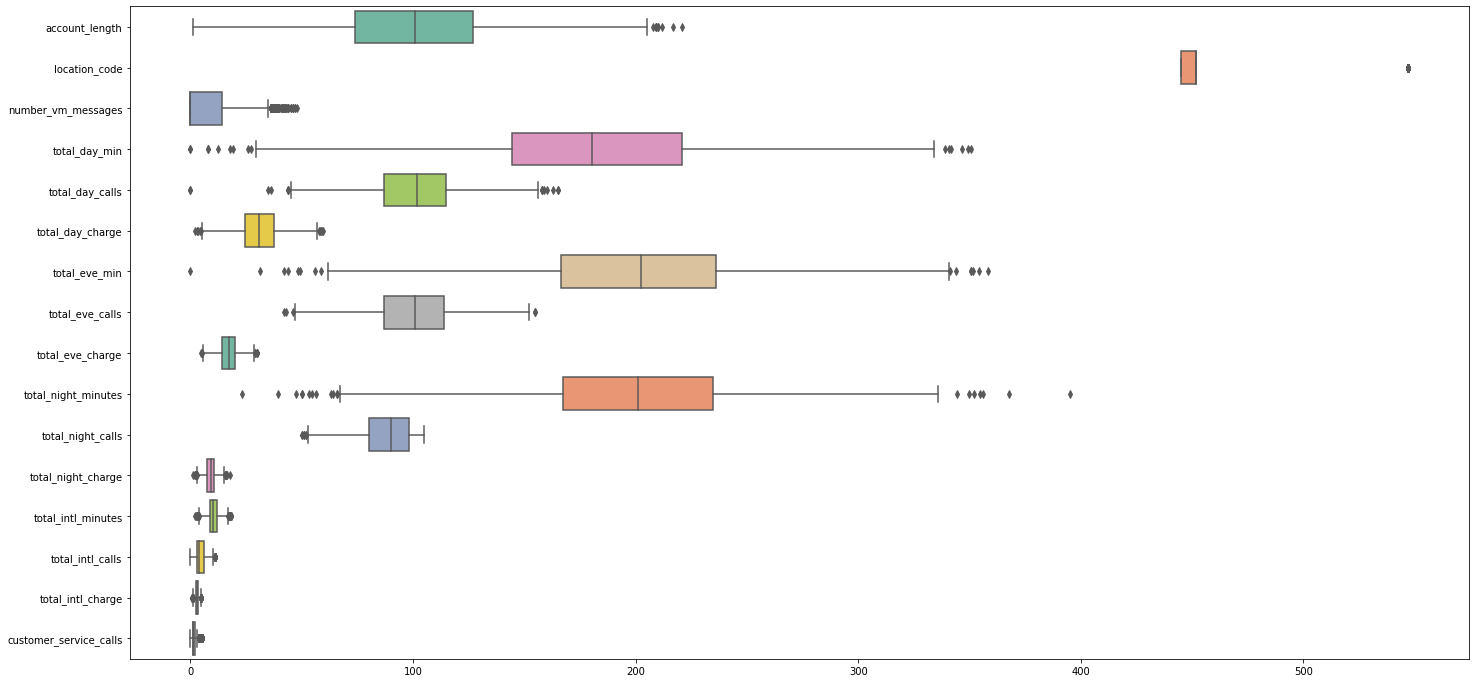

In [820]:
plt.figure(figsize=(24, 12))
ax = sns.boxplot(data=df_train, orient="h", palette="Set2")

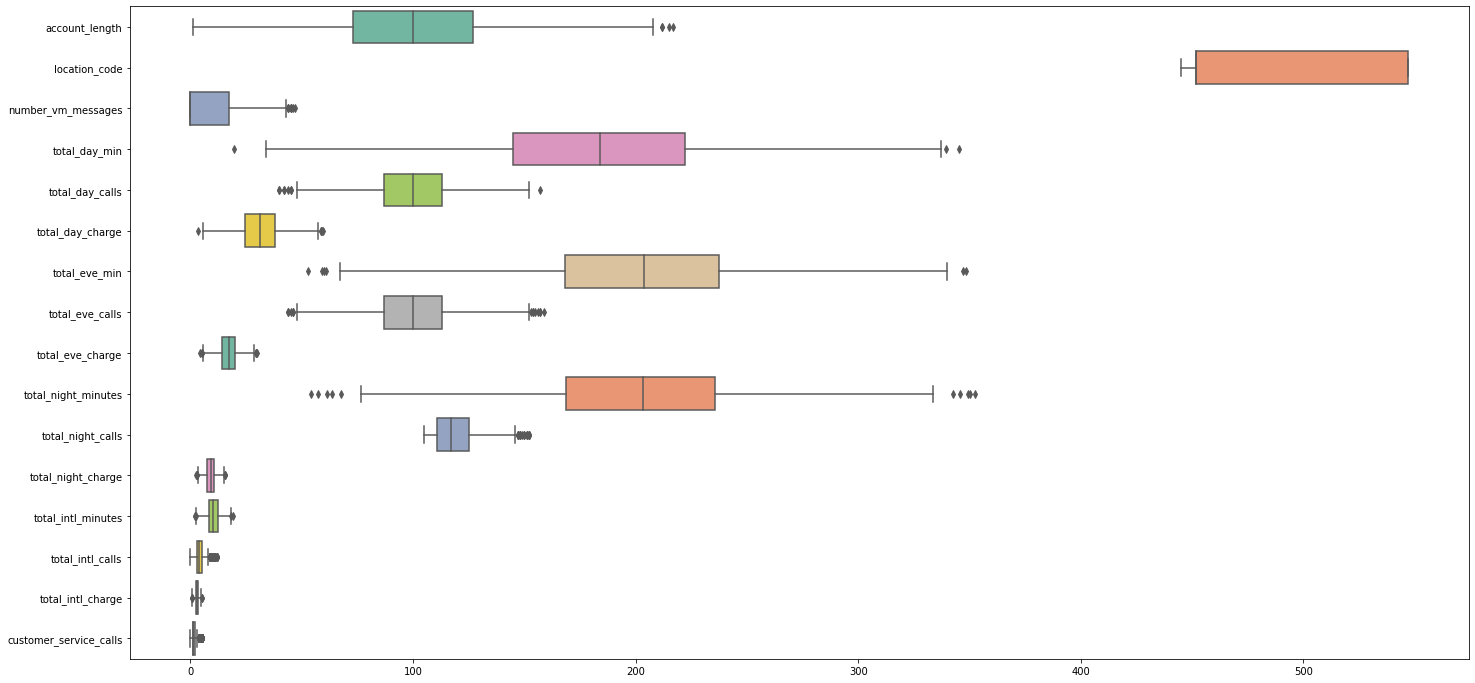

In [821]:
plt.figure(figsize=(24, 12))
ax = sns.boxplot(data=df_test, orient="h", palette="Set2")

### Encording

In [822]:
def encoder(df):
    df['intertiol_plan'].replace(to_replace='yes', value=1, inplace=True)
    df['intertiol_plan'].replace(to_replace='no', value=0, inplace=True)

    df['voice_mail_plan'].replace(to_replace='yes', value=1, inplace=True)
    df['voice_mail_plan'].replace(to_replace='no', value=0, inplace=True)

    df = pd.get_dummies(df, columns=['location_code'])
    return df

df_train['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_train['Churn'].replace(to_replace='No', value=0, inplace=True)
df_train = encoder(df_train)
df_test = encoder(df_test)

### Correlation
#### Highly Corelated Features
1. total_day_min : total_day_charge
2. total_eve_min : total_eve_charge
3. total_night_minutes : total_night_charge
4. total_intl_minutes : total_intl_charge
5. Number of vm messages: Voice mail plan

<AxesSubplot:>

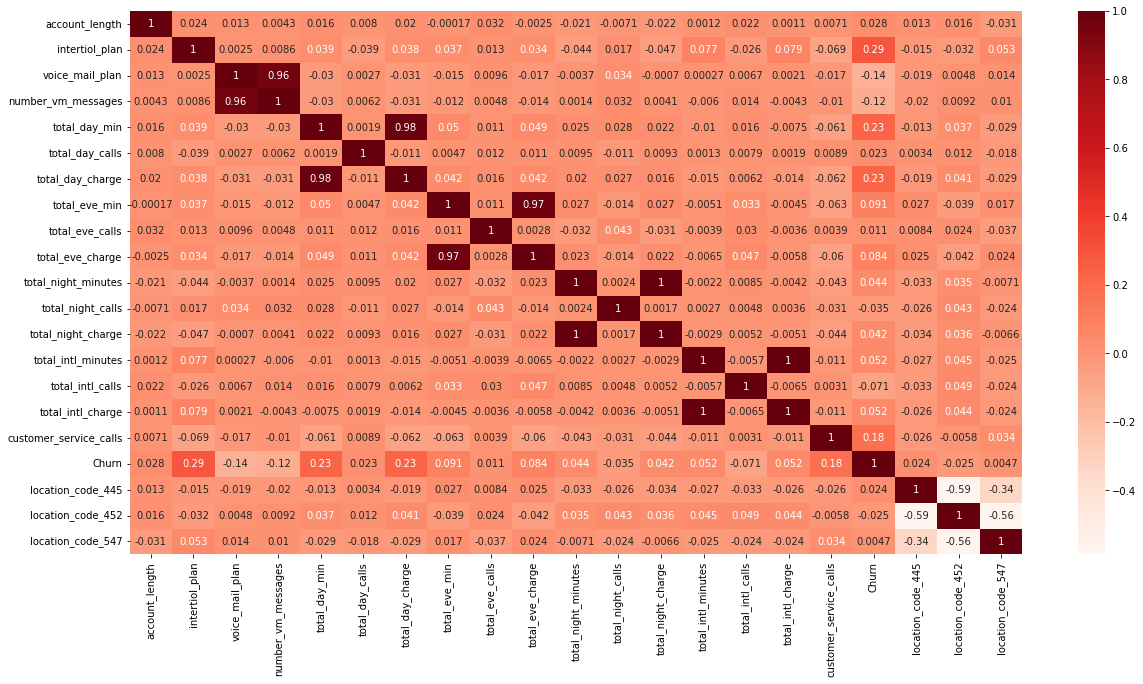

In [823]:
cor = df_train.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(cor, cmap="Reds", annot=True)

<AxesSubplot:>

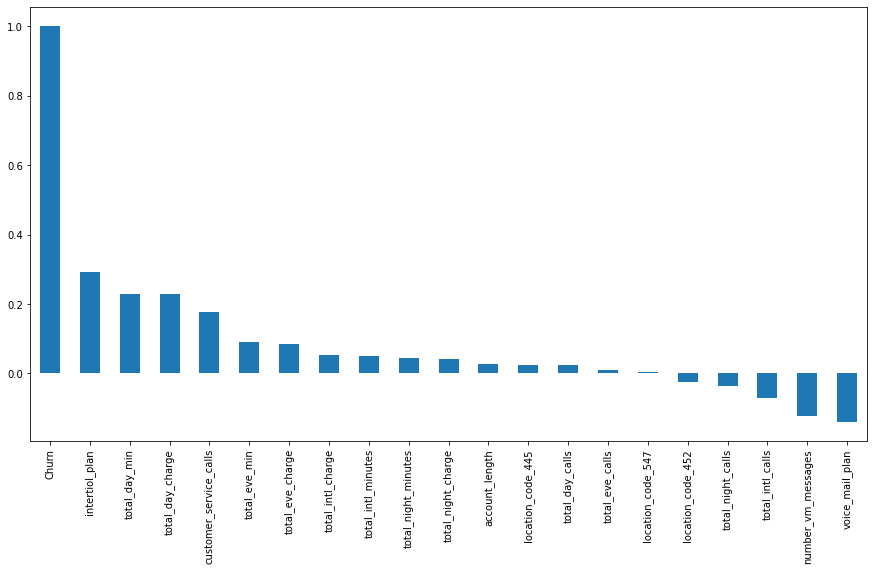

In [824]:
plt.figure(figsize=(15, 8))
df_train.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

In [825]:
cor_target = abs(cor["Churn"])
relevent_features = cor_target[cor_target > 0.001].sort_values(ascending=False)
relevent_features

Churn                     1.000000
intertiol_plan            0.291582
total_day_min             0.229907
total_day_charge          0.228876
customer_service_calls    0.176512
voice_mail_plan           0.138735
number_vm_messages        0.121067
total_eve_min             0.090513
total_eve_charge          0.084399
total_intl_calls          0.071026
total_intl_charge         0.052266
total_intl_minutes        0.051694
total_night_minutes       0.044214
total_night_charge        0.041878
total_night_calls         0.035087
account_length            0.028322
location_code_452         0.025273
location_code_445         0.024161
total_day_calls           0.023243
total_eve_calls           0.010797
location_code_547         0.004743
Name: Churn, dtype: float64

#### Principle Component Analysis

In [826]:
X = df_train.drop(['Churn'], axis=1)
X_submit = df_test
y = df_train['Churn']

In [827]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X= pd.DataFrame(sc.fit_transform(X))
X_submit = pd.DataFrame(sc.fit_transform(X_submit))

In [848]:
from sklearn.decomposition import PCA
pca_15 = PCA(n_components=15, random_state=100)
def dimensionality_reduction(X):
    pca = pca_15.fit_transform(X)
    return pd.DataFrame(data = pca, columns = ['pc' + str(i) for i in range(15)])

# pca_train = pca_14.fit_transform(X)
# X_pca = pd.DataFrame(data = pca_train
#              , columns = ['pc' + str(i) for i in range(14)])
X_15 = dimensionality_reduction(X)
X_submit_15 = dimensionality_reduction(X_submit)
X_15.head()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14
0,0.412636,-3.213308,0.230958,0.058828,-2.078262,0.996250,0.081109,-1.094347,-1.037133,-1.855021,-0.569933,0.796956,0.211397,0.797825,0.001823
1,-1.107353,-1.501162,-0.217183,-1.606707,1.087610,0.403925,0.138645,-0.873350,0.100971,-0.033870,0.718709,-0.492470,-0.330004,0.428591,-0.010424
2,-0.398811,1.725272,1.532368,2.042922,1.157332,1.909530,0.122029,-1.235593,0.502266,-0.290916,0.960026,-2.169169,0.441669,1.131495,-0.051504
3,2.490156,0.116021,1.495058,2.539333,-0.953705,-0.754687,-1.724577,0.122024,-0.974597,0.548682,0.212752,0.480346,-1.358593,-0.176665,-0.237165
4,1.608294,-0.092316,-0.846613,-0.866833,4.882116,0.365299,-0.255953,0.809178,0.946921,-0.551569,0.282407,0.327207,1.420402,-1.462571,0.426698


<AxesSubplot:>

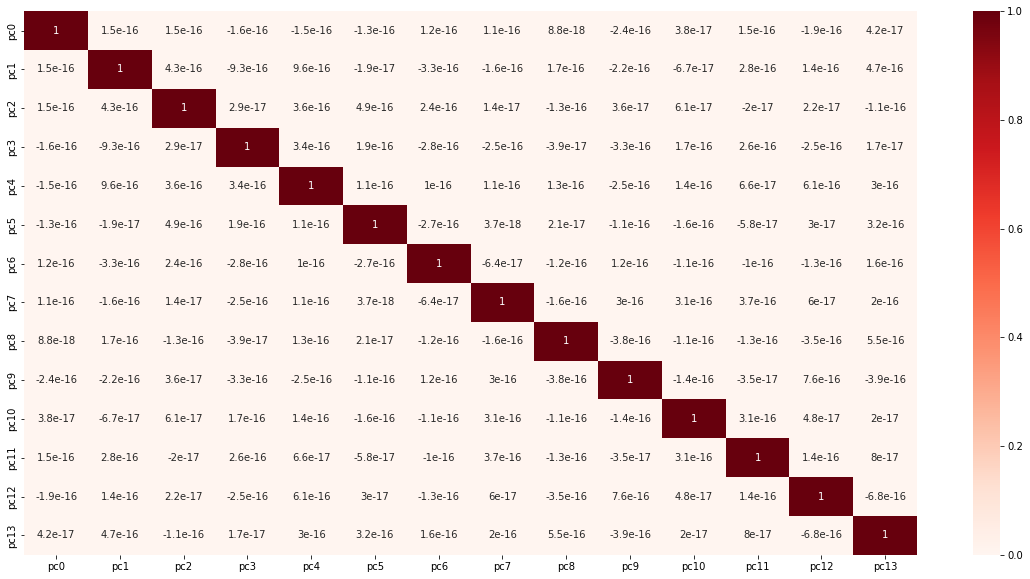

In [829]:
cor = X_15.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(cor, cmap="Reds", annot=True)

Text(0, 0.5, 'Explained variance')

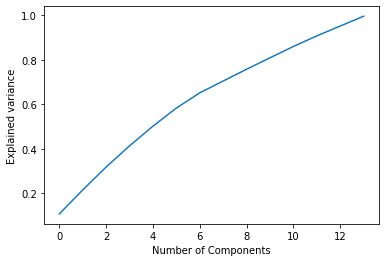

In [830]:
variance = pca_15.explained_variance_ratio_*100
plt.plot(np.cumsum(pca_15.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Explained variance")

In [831]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_15, y, test_size=0.33, random_state=30)

#### 1. SVM

In [832]:
from sklearn.svm import SVC 
svm = SVC(kernel='rbf', gamma=0.1, C=4)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
performance = binary_classification_performance(y_test, y_pred)
performance 

,Method,Value
0,Accuracy,0.9163
1,f1 score,0.8084
2,AUC_ROC,0.8842
3,Precision,0.7895
4,Recall,0.8282


In [833]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
def get_classifier(kernel_type):
    if kernel_type == 0:
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif kernel_type == 1:
        return SVC(kernel='rbf', gamma="auto")
    elif kernel_type == 2:
        return SVC(kernel='sigmoid', gamma="auto")
    elif kernel_type == 3:
        return SVC(kernel='linear', gamma="auto")

for i in range(4):
    svc_classifier = get_classifier(i) 
    svc_classifier.fit(X_train, y_train)
    y_pred = svc_classifier.predict(X_test)
    print("Evaluation:", kernels[i], "kernel")
    print(binary_classification_performance(y_test, y_pred))

Evaluation: Polynomial kernel
      Method   Value
0   Accuracy  0.8902
1   f1 score  0.7558
2    AUC_ROC  0.8564
3  Precision  0.7182
4     Recall  0.7975
Evaluation: RBF kernel
      Method   Value
0   Accuracy  0.9072
1   f1 score  0.7672
2    AUC_ROC  0.8381
3  Precision  0.8239
4     Recall  0.7178
Evaluation: Sigmoid kernel
      Method   Value
0   Accuracy  0.7098
1   f1 score  0.2649
2    AUC_ROC  0.5405
3  Precision  0.2878
4     Recall  0.2454
Evaluation: Linear kernel
      Method   Value
0   Accuracy  0.8013
1   f1 score  0.3719
2    AUC_ROC  0.6098
3  Precision  0.5696
4     Recall  0.2761


So **RBF kernel** and **Polynomial kernel** more suitable for this context

In [834]:
#### Random Grid 1 #####
# C = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]
# gamma = [1, 0.1, 0.01, 0.001, 0.0001]
# kernel =['rbf', 'poly']

# {'kernel': 'rbf', 'gamma': 0.1, 'C': 5}

# Accuracy	0.9176
# f1 score	0.8131
# AUC_ROC	0.8895

#### Random Grid 2 #####
# C = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# gamma = [1, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01]
# kernel =['rbf', 'poly']

# {'kernel': 'rbf', 'gamma': 0.1, 'C': 4}



# random_grid = {'C': C,
#                'gamma': gamma,
#                'kernel': kernel}
# print(random_grid)

# svm_random = RandomizedSearchCV(estimator = svm, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=0, random_state=42, n_jobs = -1)
# svm_random.fit(X_train, y_train)

# svm_random.best_params_

In [835]:
# test_pred = svm.predict(X_submit)
# submission(test_pred,  'SVM')

#### 2. Logistic Regression

In [836]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver='liblinear', penalty='l2', C=0.001)
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
performance = binary_classification_performance(y_test, y_pred)
performance

,Method,Value
0,Accuracy,0.8039
1,f1 score,0.4966
2,AUC_ROC,0.6763
3,Precision,0.5481
4,Recall,0.4540


In [837]:
#### Random Grid 1 #####
# solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
# penalty = ['l1', 'l2']
# C = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]

# {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.001}

# Accuracy	0.8039
# f1 score	0.4966
# AUC_ROC	0.6763

# random_grid = {'solver': solvers,
#                'penalty': penalty,
#                'C': C
#                }
# print(random_grid)

# lg_random = RandomizedSearchCV(estimator = lg, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# lg_random.fit(X_train, y_train)

# lg_random.best_params_

#### 3. RandomForestClassifier

In [838]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
     bootstrap= False,
 max_depth= 62,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 3,
 n_estimators= 90
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
performance = binary_classification_performance(y_test, y_pred)
performance

,Method,Value
0,Accuracy,0.9229
1,f1 score,0.8162
2,AUC_ROC,0.8794
3,Precision,0.8291
4,Recall,0.8037


In [839]:
#### Random Grid 1 #####
# n_estimators = [int(i) for i in range(100, 3000, 10)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(i) for i in range(5, 200, 5)]
# max_depth.append(None)
# min_samples_split = [int(i) for i in range(10)]
# min_samples_leaf = [int(i) for i in range(5)]
# bootstrap = [True, False]

# {'n_estimators': 290,
#  'min_samples_split': 3,
#  'min_samples_leaf': 1,
#  'max_features': 'auto',
#  'max_depth': 35,
#  'bootstrap': True}

# Accuracy	0.9451
# f1 score	0.8645
# AUC_ROC	0.9002

#### Random Grid 2 #####
# n_estimators = [int(i) for i in range(10, 500, 5)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(i) for i in range(2, 100, 2)]
# max_depth.append(None)
# min_samples_split = [int(i) for i in range(5)]
# min_samples_leaf = [int(i) for i in range(4)]
# bootstrap = [True, False]

# {'n_estimators': 90,
#  'min_samples_split': 3,
#  'min_samples_leaf': 1,
#  'max_features': 'auto',
#  'max_depth': 62,
#  'bootstrap': False}

#  #### Random Grid 3 #####
# n_estimators = [int(i) for i in range(10, 200, 2)]
# max_features = ['auto', 'sqrt']
# max_depth = [int(i) for i in range(2, 150, 1)]
# max_depth.append(None)
# min_samples_split = [int(i) for i in range(1,4)]
# min_samples_leaf = [int(i) for i in range(1, 3)]
# bootstrap = [True, False]



# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}
# print(random_grid)

# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=0, random_state=42, n_jobs = -1)
# rf_random.fit(X_train, y_train)

# rf_random.best_params_

In [840]:
# test_pred = rf.predict(X_submit)
# submission(test_pred,  'RandomForestClassifier')

#### 4. XGBoost Classifier

In [841]:
import xgboost as xgb
from xgboost import XGBClassifier    
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
performance = binary_classification_performance(y_test, y_pred)
performance

[08:57:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Method,Value
0,Accuracy,0.9229
1,f1 score,0.8139
2,AUC_ROC,0.8749
3,Precision,0.8377
4,Recall,0.7914


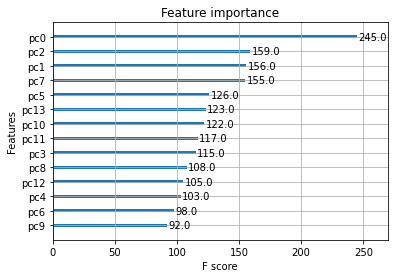

<Figure size 1152x864 with 0 Axes>

In [842]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.show()

In [843]:
### Random Grid 1 #####
params = { 'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
 'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
 'min_child_weight' : [ 1, 3, 5, 7 ],
 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
}

sgb_random=RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=10, scoring='roc_auc',n_jobs=-1,cv=5,verbose=0)
sgb_random.fit(X_train,y_train)
sgb_random.best_params_

In [844]:
# test_pred = xgb_clf.predict(X_submit)
# submission(test_pred,  'XGBClassifier')

#### 5. KNN

In [845]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 5, leaf_size= 89)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
performance = binary_classification_performance(y_test, y_pred)
performance

,Method,Value
0,Accuracy,0.8471
1,f1 score,0.6139
2,AUC_ROC,0.7462
3,Precision,0.6643
4,Recall,0.5706


In [846]:
### Random Grid 1 #####
# leaf_size = [int(i) for i in range (1,100)]
# n_neighbors = [int(i) for i in range(1,57)]

# random_grid = {'leaf_size': leaf_size,
#                'n_neighbors': n_neighbors
#                }
# print(random_grid)

# knn_random = RandomizedSearchCV(estimator = knn, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=0, random_state=42, n_jobs = -1)
# knn_random.fit(X_train, y_train)

# knn_random.best_params_

In [847]:
# test_pred = knn.predict(X_submit)
# submission(test_pred,  'KNN')